# Hyper-parameters Study

We wish here to study the influence of some parameters of our model on the relative error.

In [1]:
import sqlite3
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(database_file):
    conn = sqlite3.connect(database_file)
    df = pd.read_sql_query("SELECT * FROM results", conn)
    conn.close()
    return df

database_file = '../results.db'
df = load_data(database_file)

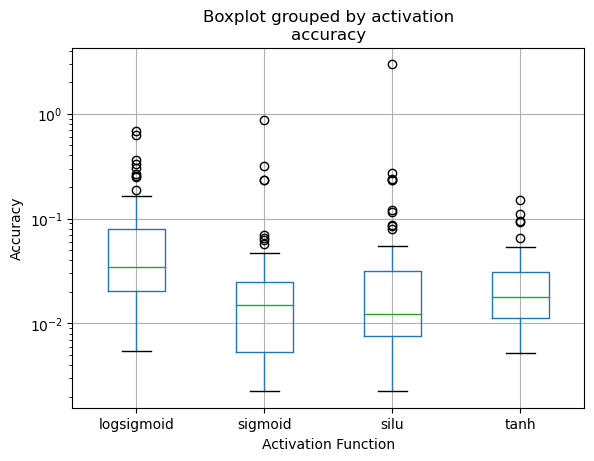

In [3]:
df['activation'] = df['model_name'].str.extract(r'(tanh|sigmoid|silu|logsigmoid)')

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('activation')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
# ax = grouped_data.plot.bar(x='activation', y='accuracy', legend=False, figsize=(10, 6))
ax = df.boxplot(column='accuracy', by='activation')
#ax.set_ylim(0.0, 1.0)
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Activation Function')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

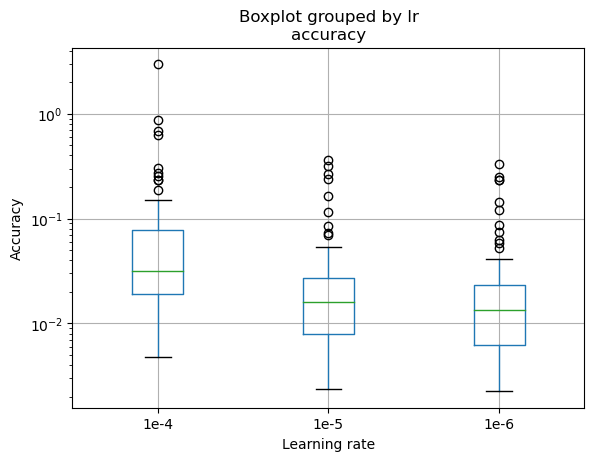

In [4]:
df['lr'] = df['model_name'].str.extract(r'(1e-3|1e-4|1e-5|1e-6)')

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('lr')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
#ax = grouped_data.plot.bar(x='lr', y='accuracy', legend=False, figsize=(10, 6))
ax = df.boxplot(column='accuracy', by='lr')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Learning rate')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

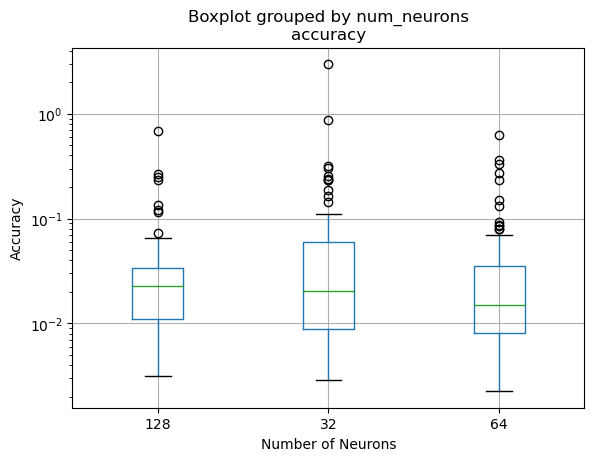

In [5]:
df['num_neurons'] = df['model_name'].str.extract(r'(32|64|128)')

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('num_neurons')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
# ax = grouped_data.plot.bar(x='num_neurons', y='accuracy', legend=False, figsize=(10, 6))
ax = df.boxplot(column='accuracy', by='num_neurons')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Number of Neurons')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

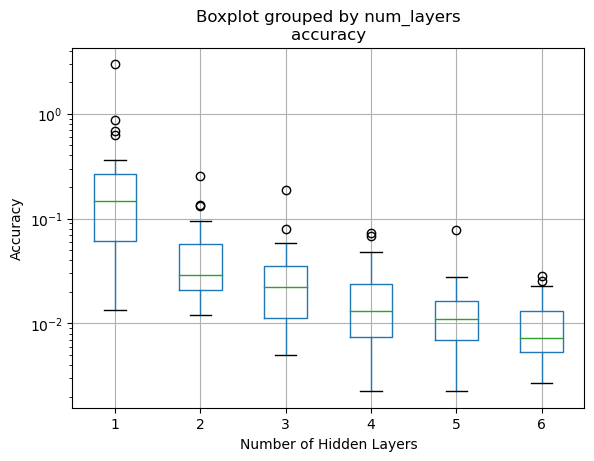

In [6]:
df['num_layers'] = df['model_name'].str.extract(r'([1-7])').astype(int)

# Grouper les données par fonction d'activation et calculer la précision moyenne
grouped_data = df.groupby('num_layers')['accuracy'].mean().reset_index()

# Créer un diagramme à barres avec les fonctions d'activation et les précisions
# ax = grouped_data.plot.bar(x='num_layers', y='accuracy', legend=False, figsize=(10, 6))
ax = df.boxplot(column='accuracy', by='num_layers')
ax.set_yscale('log')
# Configurer le graphique
ax.set_xlabel('Number of Hidden Layers')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

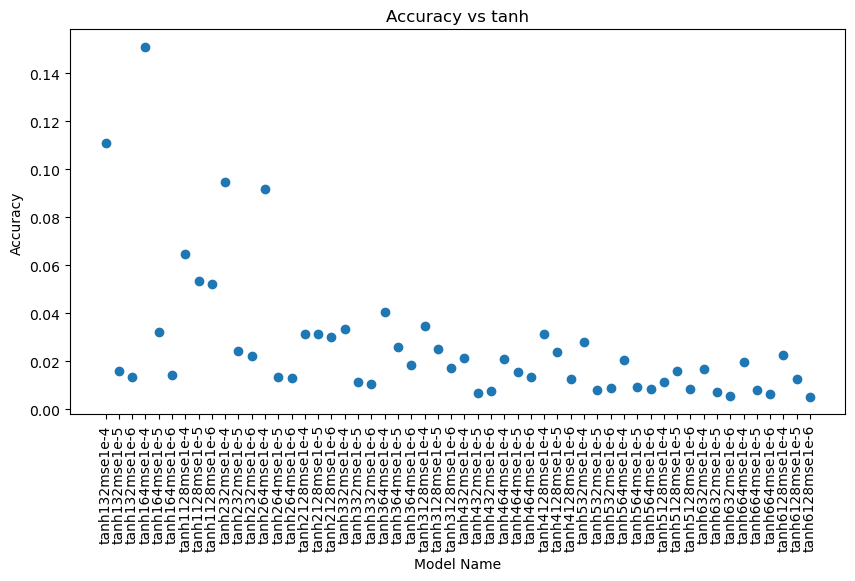

In [7]:
def plot_accuracy(df, hyperparameter):
    filtered_df = df[df['model_name'].str.contains(hyperparameter)]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(filtered_df['model_name'], filtered_df['accuracy'])
    plt.xlabel('Model Name')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs {hyperparameter}')
    plt.xticks(rotation=90)
    plt.show()

# Exemple d'utilisation :
plot_accuracy(df, 'tanh')